# Clases de Machine Learning

In [1]:
import os, sys
import pandas as pd 
import numpy as np 
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt 


In [2]:
#Definir las rutas de los directorios 
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent 

In [3]:
query = """
SELECT  
  *
FROM 
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` 

LIMIT 
  10000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,8f7085c0a9632f3c462c5543cb9df420df1f4029,c51889ed8a7b4e546482f2bbe16bee57680f70542e78a7...,2016-10-23 16:45:00+00:00,2016-10-23 17:15:00+00:00,1601,13.6,<NA>,<NA>,<NA>,<NA>,...,0.0,0.01,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
1,9414ae6ac589eb8c92065bd8926aaa332fb62283,c51889ed8a7b4e546482f2bbe16bee57680f70542e78a7...,2016-10-23 17:30:00+00:00,2016-10-23 17:45:00+00:00,783,3.8,<NA>,<NA>,<NA>,<NA>,...,0.0,14.95,Credit Card,303 Taxi,NaN,NaN,None,NaN,NaN,None
2,a09cc3a425b81b87b990721a767da373364496a0,25f108dbdee2f40abf533ec54828d51019935abcf13c9a...,2018-01-14 15:15:00+00:00,2018-01-14 15:30:00+00:00,593,1.1,<NA>,<NA>,<NA>,<NA>,...,0.0,6.80,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
3,ce18b8ad09a687248fdf69f35e31dc6bd926effd,28cc6d01750f2d536f164256e6a563ac6e8031e88e8519...,2018-01-04 07:30:00+00:00,2018-01-04 07:30:00+00:00,305,1.2,<NA>,<NA>,<NA>,<NA>,...,0.0,5.20,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
4,37c4d9d1f0298df2d8151d2ad6f9a5c0306d10ff,28cc6d01750f2d536f164256e6a563ac6e8031e88e8519...,2018-01-04 08:00:00+00:00,2018-01-04 08:00:00+00:00,4,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,2.00,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None


In [4]:
df["trip_total"].value_counts()

0.01     1503
2.00      654
6.00      174
8.00      161
7.00      153
         ... 
53.70       1
68.14       1
62.40       1
96.50       1
33.55       1
Name: trip_total, Length: 1075, dtype: int64

In [5]:
df = df[df["trip_total"] >= 1.0]
df["payment_type"].value_counts()

Cash           6119
Credit Card    2332
Mobile           27
Prcard           19
Name: payment_type, dtype: int64

In [6]:
df = df[(df["payment_type"] == "Cash") | (df["payment_type"] == "Credit Card")]
df["payment_type"].value_counts()

Cash           6119
Credit Card    2332
Name: payment_type, dtype: int64

In [7]:
# get only numeric colums 
numerics = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
1,783,3.8,<NA>,<NA>,<NA>,<NA>,13.0,1.95,NaN,0.0,14.95,NaN,NaN,NaN,NaN
2,593,1.1,<NA>,<NA>,<NA>,<NA>,6.8,0.00,NaN,0.0,6.80,NaN,NaN,NaN,NaN
3,305,1.2,<NA>,<NA>,<NA>,<NA>,5.2,0.00,NaN,0.0,5.20,NaN,NaN,NaN,NaN
4,4,0.0,<NA>,<NA>,<NA>,<NA>,2.0,0.00,NaN,0.0,2.00,NaN,NaN,NaN,NaN
5,1,0.0,<NA>,<NA>,<NA>,<NA>,2.0,0.00,NaN,0.0,2.00,NaN,NaN,NaN,NaN


In [22]:
cols = ["trip_total",'trip_seconds', 'fare', 'extras', 'payment_type']
data = df[~df['trip_seconds'].isna()][cols]  #estoy eliminando los Nan
X = data[cols[:-1]].values    #Todas las columnas menos la utlima
y = data[cols[-1]].values     #La ultima columna

In [23]:
data.describe()

,trip_total,trip_seconds,fare,extras
count,8448.000000,8448.000000,8448.000000,8448.000000
mean,13.891268,742.456321,12.191755,0.652876
std,16.104158,1196.029764,13.915567,2.683721
min,1.010000,0.000000,0.010000,0.000000
25%,5.750000,270.000000,5.200000,0.000000
50%,8.750000,498.000000,7.750000,0.000000
75%,14.800000,877.000000,13.400000,0.000000
max,500.800000,43320.000000,500.800000,55.000000


# SPLIT TRAIN AND TEST 

In [24]:
#Evaluar el modelo sobreeeeeeee el conjunto de prueba, nunca el de entrenamiento 

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 ) # Cojo el (30 % Test_size= 0.3)

In [26]:
print("Total trein data :  ", X_train.shape)
print("Total trein data :  ", X_test.shape)

Total trein data :   (5913, 4)
Total trein data :   (2535, 4)


# TRAIN MODEL: LINEAR REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()        #No es un metodo de regresion, es de clasificacion 
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
print("Hyperparameters")

Hyperparameters


In [29]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
y_pred = lr.predict(X_test)
np.unique(y_pred, return_counts =True) 

(array(['Cash', 'Credit Card'], dtype=object), array([1865,  670]))

In [31]:
np.unique(y_test, return_counts =True)

(array(['Cash', 'Credit Card'], dtype=object), array([1816,  719]))

<BarContainer object of 2 artists>

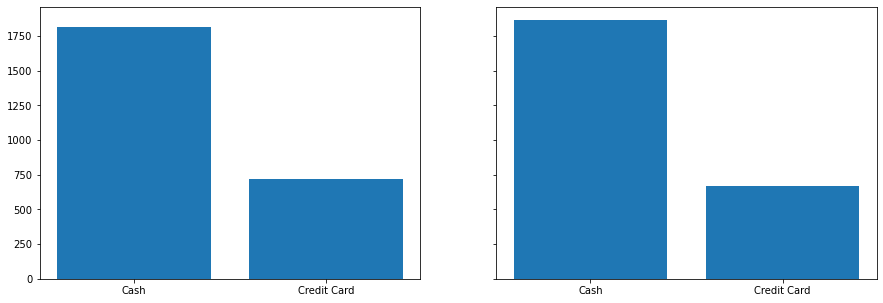

In [32]:
labels_true, values_true = np.unique(y_test, return_counts=True)
labels_pred, values_pred = np.unique(y_pred, return_counts=True)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
ax[0].bar(labels_true, values_true)
ax[1].bar(labels_pred, values_pred)

# Evaluate model 

In [33]:
from sklearn.metrics import confusion_matrix
lr_conf_matrix = confusion_matrix(y_test, y_pred)

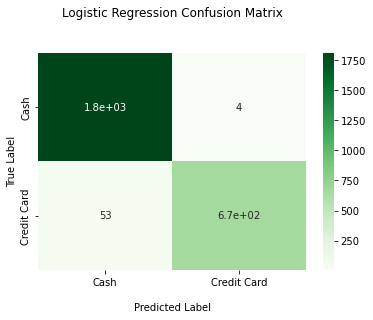

In [34]:
ax = sns.heatmap(lr_conf_matrix, cmap='Greens', annot=True)

ax.set_title('Logistic Regression Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label')

ax.xaxis.set_ticklabels(['Cash', 'Credit Card'])
ax.yaxis.set_ticklabels(['Cash', 'Credit Card']);

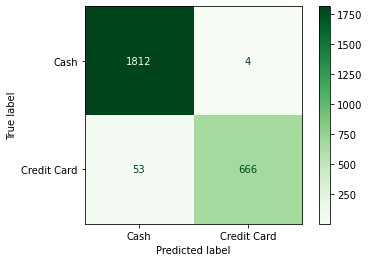

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap = "Greens")

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
print('Logistic Regression Performance:')
print('Accuracy:                ', accuracy_score(y_test, y_pred))

print('Precission Cash:         ', precision_score(y_test, y_pred, pos_label='Cash'))    #Tengo que decirle cual es el positivo, aca seria Cash
print('Precission Credict Card: ', precision_score(y_test, y_pred, pos_label='Credit Card'))

print('Recall Cash              ', recall_score(y_test, y_pred, pos_label='Cash'))
print('Recall Credit Card       ', recall_score(y_test, y_pred, pos_label='Credit Card'))

print('F1-score Cash:           ', f1_score(y_test, y_pred, pos_label='Cash'))
print('F1-score Credit Card:    ', f1_score(y_test, y_pred, pos_label='Credit Card'))

Logistic Regression Performance:
Accuracy:                 0.9775147928994082
Precission Cash:          0.9715817694369974
Precission Credict Card:  0.9940298507462687
Recall Cash               0.9977973568281938
Recall Credit Card        0.9262865090403338
F1-score Cash:            0.9845150774246129
F1-score Credit Card:     0.9589632829373651


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


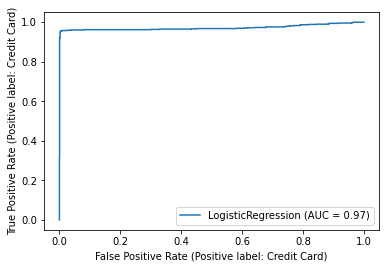

In [38]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


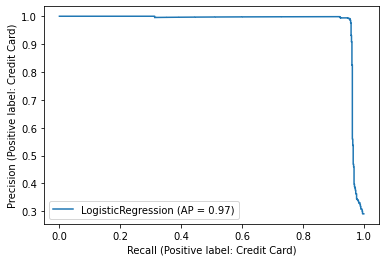

In [39]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr,X_test,y_test ) #Esos picos significan inestabilidad 

<BarContainer object of 4 artists>

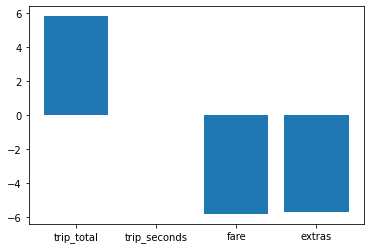

In [40]:
plt.bar(cols[:-1], lr.coef_.flatten() )  # ecuacion 

-------------------------------------------

---------------------------------------